In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

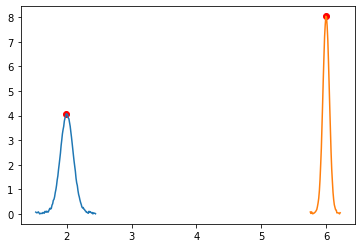

[23.39212863 11.85192419]


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.signal import find_peaks

mus = [2, 6]
sigmas = [0.1, 0.05]
x = np.linspace(0, 10, 1000)

data = np.zeros(shape=x.shape)
for m, s in zip(mus, sigmas):
    data += norm.pdf(x, m, s)

noise = np.random.random(data.shape) * 0.1
data = data + noise

# find the peaks and properties
peaks, properties = find_peaks(data, height=0,prominence=0.1, width=0.8)
npeak = len(peaks) # number of peaks
width = properties["widths"]

start = peaks-(2*width)
end = peaks+(2*width)
filtered =[]

# store the data near peaks into "filtered"
for i in range(0, npeak ):

    p_x=x[int(start[i]):int(end[i])]
    p_d=data[int(start[i]):int(end[i])]
    filtered.append({'peak_number':i, "x":p_x, "data":p_d})

# plot filtered data
for i in range(0,npeak):
    plt.plot(filtered[i]["x"], filtered[i]["data"])


plt.scatter(x[peaks],data[peaks],c="red") #mark peaks

plt.show()
print (properties["widths"])

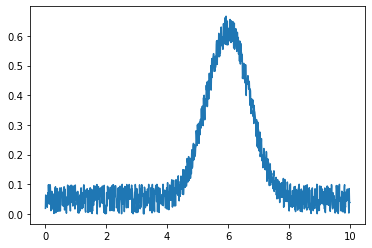

In [40]:
mus = [6]
sigmas = [0.7]
x = np.linspace(0,10,1000)

data = np.zeros(shape=x.shape)
for m,s in zip(mus,sigmas):
    data += norm.pdf(x, m, s)
    
noise = np.random.random(data.shape) * 0.1
data = data + noise

plt.plot(x, data)

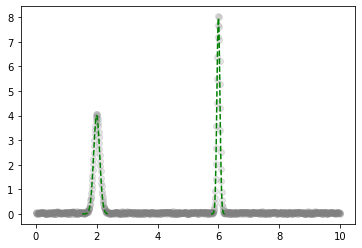

In [48]:
from scipy.optimize import curve_fit

for i in range(npeak):
    popt, pcov = curve_fit(norm.pdf, filtered[i]["x"], filtered[i]["data"], p0=(1,1)) 
    plt.plot(filtered[i]["x"], norm.pdf(filtered[i]["x"], *popt),'g--')

plt.scatter(x, data, color='grey', alpha=0.2)